# Project: Statistical Analysis
Overview
The goal of this project is for you to practice statistical analysis using the iterative data analysis process. For this project, you will use this Housing Prices dataset we choose for you. You need to download the train.csv dataset then use your statistical analysis skills to analyze this dataset. The goal of your analysis is to identify the most important features of houses that affect the sale prices.

You will be working individually for this project, but we'll be guiding you along the process and helping you as you go.

# Technical Requirements
The technical requirements for this project are as follows:

Try to apply everything you have learned so far about data analysis (in creative ways if you can) such as data cleaning, data manipulation, data visualization, and various statistical analysis methods.

Apply the iterative data analysis process -- setting expectations, collecting information, and reacting to data / revising expectations.

Conduct your analysis in Jupyter Notebook using Pandas, Numpy, Scipy, Matplotlib, Seaborn, Plotly, and other Python libraries you have learned, as necessary.

# Necessary Deliverables
The following deliverables should be pushed to your Github repo for this project.

A Jupyter Notebook (statistical-analysis.ipynb) containing your Python codes, outputs, and data visualizations. Make sure to include explanations for each of your steps in Markdown cells or Python comments.

[optional] A README.md file containing any additional information.

# Suggested Ways to Get Started
Explore data and understand what the fields mean.

Examine the relationships between the sales price and other features in the dataset. Use data visualization techniques to help you gain intuitive understanding of the relationships.

Make informed guess on which features should be investigated in depth.

Data cleaning & manipulation. Apply the following techniques as appropriate:

Adjust skewed data distribution.
Remove columns with high proportion of missing values.
Remove records with missing values.
Feature reduction.
Convert categorical data to numerical.
Compute field relationship scores with the chosen statistical model.

Present your findings in statistical summary and/or data visualizations.w

In [4]:
#Libraries

# Basic ones
import pandas as pd
import numpy as np

# Scipy
import scipy

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import svm

# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer

# Model summaries n shit
import statsmodels.api as sm

# Datetime
from datetime import datetime as dt

## Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
housing = pd.read_csv('../your-code/house-prices-advanced-regression-techniques/train.csv')
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


<AxesSubplot:>

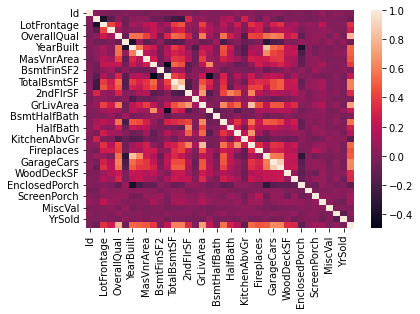

In [10]:
correlation = housing.corr()
sns.heatmap(housing.corr())

In [11]:
"There's no highly correlated columns"

"There's no highly correlated columns"

# Missing Values

In [12]:
housing.isna().sum().sort_values()/housing.shape[0]

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
LandSlope        0.000000
LandContour      0.000000
LotShape    

In [13]:
housing.drop(labels= ['PoolQC','MiscFeature', 'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'Heating', 'Utilities', 'Condition2'] ,axis=1, inplace=True)
housing.dropna(inplace=True)

In [14]:
housing.isna().sum()/housing.shape[0]

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

# Unique Values

In [15]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [22]:
max_corr = np.abs(housing.corr()['SalePrice'])>0.5
max_corr

Id               False
MSSubClass       False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt      False
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool

In [23]:
max_corr2 = housing.select_dtypes(include = 'number').columns[max_corr]
max_corr2

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [24]:
housing[max_corr2]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [ ]:
linear and decision tree